# Case Study - House Price Prediction
# Linear Regression

### Problem Statement:

We have data of sales of houses in some area. For each house we have complete information about its size, price, number of bedrooms, number of bathrooms, whether it is made of bricks and neighborhood.
Objective of this case study is to check which factors are affecting house prices.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_regression, RFE, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [2]:
df = pd.read_csv("House_Prices.csv")
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


### Data Audit

**Getting Insights about the Dataset**

In [3]:
df.shape

(128, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [5]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [6]:
report = pandas_profiling.ProfileReport(df)
report

# report.to_file('profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Data Cleaning**

In [7]:
# Checking NULL values

df.isna().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

There are no NULL values in the dataset, hence it is clean.

In [8]:
# Dropping "Home" variable as it is a unique variable.

df.drop(columns = ['Home'], axis = 1, inplace = True)
df.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

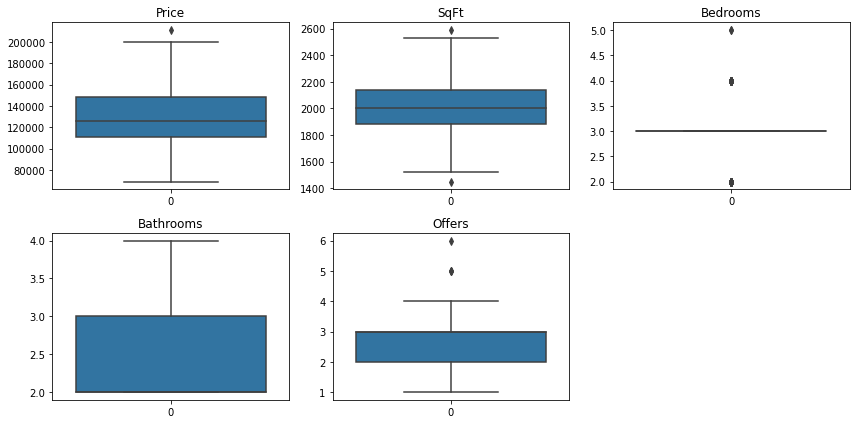

In [9]:
# Outlier Detection

fig, axs = plt.subplots(2,3, figsize = (12,6))

sns.boxplot(data = df['Price'], ax = axs[0,0])
axs[0, 0].set_title('Price')
sns.boxplot(data = df['SqFt'], ax = axs[0,1])
axs[0, 1].set_title('SqFt')
sns.boxplot(data = df['Bedrooms'], ax = axs[0,2])
axs[0, 2].set_title('Bedrooms')
sns.boxplot(data = df['Bathrooms'], ax = axs[1,0])
axs[1, 0].set_title('Bathrooms')
sns.boxplot(data = df['Offers'], ax = axs[1,1])
axs[1, 1].set_title('Offers')
fig.delaxes(axs[1][2])
plt.tight_layout()

In [10]:
# Outlier Treatment

def outlier_treat(x):
    if(x.dtype == 'float64') or (x.dtype == 'int'):
            x = x.clip(lower = x.quantile(0.05), upper = x.quantile(0.95))
    else:
        x
    return x

In [11]:
# Applying outlier_treat function to df.

df = df.apply(outlier_treat)

**Visualizing Numerical Variables**

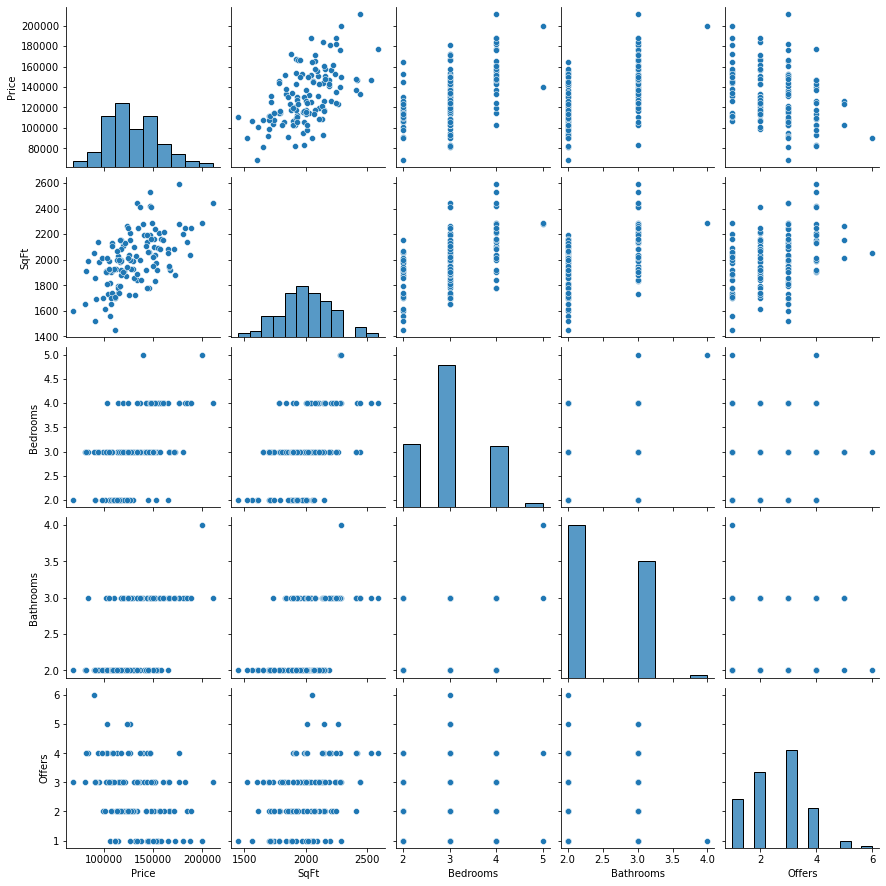

In [12]:
sns.pairplot(df)
plt.show()

**Visualizing Categorical Variables**

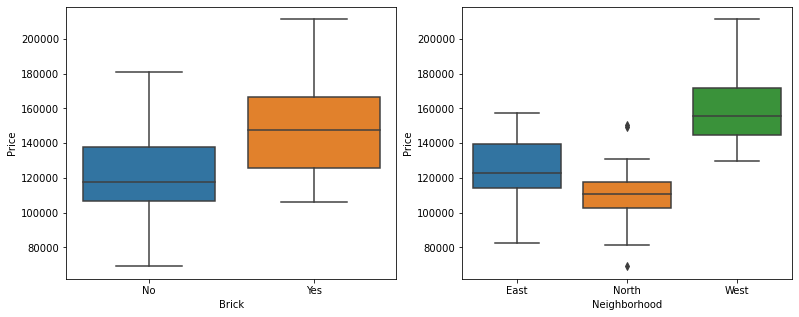

In [23]:
plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'Brick', y = 'Price', data = df)
plt.subplot(1,2,2)
sns.boxplot(x = 'Neighborhood', y = 'Price', data = df)
plt.show()

### Data Preparation

**Dummy Variable Creation**

In [24]:
df1 = pd.get_dummies(df, columns = ['Brick', 'Neighborhood'], drop_first = True)
df1

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,114300,1790,2,2,2,0,0,0
1,114200,2030,4,2,3,0,0,0
2,114800,1740,3,2,1,0,0,0
3,94700,1980,3,2,3,0,0,0
4,119800,2130,3,3,3,0,0,0
...,...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,1,0,0
124,147900,2160,4,3,3,1,0,0
125,113500,2070,2,2,2,0,1,0
126,149900,2020,3,3,1,0,0,1


**Calculating Coefficient of Variance for Variables**

In [25]:
# Coefficient of Variance

df1.apply(lambda x: x.std()/x.mean())

Price                 0.206006
SqFt                  0.105737
Bedrooms              0.240108
Bathrooms             0.210399
Offers                0.414768
Brick_Yes             1.436573
Neighborhood_North    1.387128
Neighborhood_West     1.516582
dtype: float64

**Checking if Y is normal or not.**

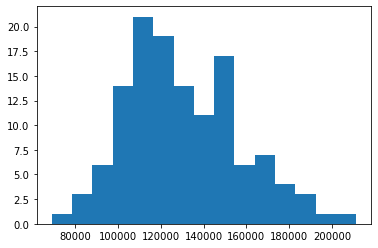

In [26]:
# Checking if Y is normal or not by looking at the histogram.

plt.hist(df1['Price'], bins = 15)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

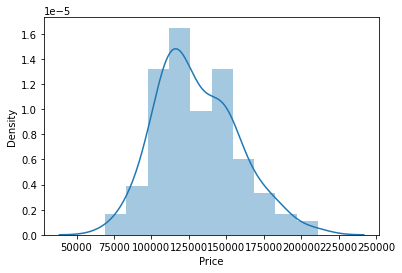

In [27]:
# Using density curve for the better understanding

sns.distplot(df1.Price)

<AxesSubplot:xlabel='Price', ylabel='Density'>

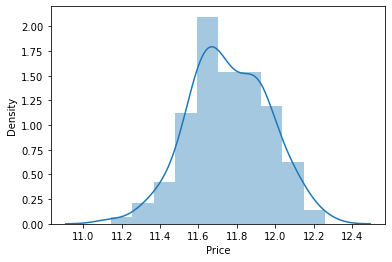

In [28]:
# Applying transformation to avoid skewness using log.

sns.distplot(np.log(df1.Price))

In [29]:
# Storing transformed values into new variable.

df1['ln_Price'] = np.log(df1.Price)
df1

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,ln_Price
0,114300,1790,2,2,2,0,0,0,11.646582
1,114200,2030,4,2,3,0,0,0,11.645707
2,114800,1740,3,2,1,0,0,0,11.650947
3,94700,1980,3,2,3,0,0,0,11.458469
4,119800,2130,3,3,3,0,0,0,11.693579
...,...,...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,1,0,0,11.692744
124,147900,2160,4,3,3,1,0,0,11.904292
125,113500,2070,2,2,2,0,1,0,11.639558
126,149900,2020,3,3,1,0,0,1,11.917724


**Correlation**

In [31]:
# Checking if Y and X variables have some kind of relationship through Correlation.

corr = df1.corrwith(df1.ln_Price)
corr

Price                 0.990868
SqFt                  0.556572
Bedrooms              0.508153
Bathrooms             0.508113
Offers               -0.326332
Brick_Yes             0.442163
Neighborhood_North   -0.559956
Neighborhood_West     0.689422
ln_Price              1.000000
dtype: float64

In [32]:
# Removing dependent variables and choosing the variables with strong correlation, abs(corr)>0.1 & above.

var_corr = ['SqFt', 
'Bedrooms',
'Bathrooms',
'Offers',
'Brick_Yes',
'Neighborhood_North',
'Neighborhood_West']

### Feature Engineering

**Separating X variables & Y variable**

In [33]:
X = df1[df1.columns.difference(['Price', 'ln_Price'])]
X

,Bathrooms,Bedrooms,Brick_Yes,Neighborhood_North,Neighborhood_West,Offers,SqFt
0,2,2,0,0,0,2,1790
1,2,4,0,0,0,3,2030
2,2,3,0,0,0,1,1740
3,2,3,0,0,0,3,1980
4,3,3,0,0,0,3,2130
...,...,...,...,...,...,...,...
123,3,3,1,0,0,3,1900
124,3,4,1,0,0,3,2160
125,2,2,0,1,0,2,2070
126,3,3,0,0,1,1,2020


In [34]:
Y = df1.ln_Price
Y

0      11.646582
1      11.645707
2      11.650947
3      11.458469
4      11.693579
         ...    
123    11.692744
124    11.904292
125    11.639558
126    11.917724
127    11.732864
Name: ln_Price, Length: 128, dtype: float64

**Performing F-Regression/ Univariate Regression**

In [35]:
F_values, p_values = f_regression(X,Y)

In [36]:
F_values

array([ 43.85221311,  43.86161997,  30.62065862,  57.55333435,
       114.13817244,  15.01727691,  56.54849881])

In [37]:
p_values

array([9.21571702e-10, 9.18292875e-10, 1.73846148e-07, 6.33753969e-12,
       2.30689361e-19, 1.70419544e-04, 9.00791233e-12])

In [38]:
# Combining variables with their F_values and p_values into one df

f_reg_results = pd.concat([pd.Series(X.columns), pd.Series(F_values), pd.Series(p_values)], axis = 1)
f_reg_results

,0,1,2
0,Bathrooms,43.852213,9.215717e-10
1,Bedrooms,43.861620,9.182929e-10
2,Brick_Yes,30.620659,1.738461e-07
3,Neighborhood_North,57.553334,6.337540e-12
4,Neighborhood_West,114.138172,2.306894e-19
5,Offers,15.017277,1.704195e-04
6,SqFt,56.548499,9.007912e-12


In [39]:
# Renaming the f_reg_results columns.

f_reg_results.columns = ['Feature', 'F_value', 'P_value']
f_reg_results

,Feature,F_value,P_value
0,Bathrooms,43.852213,9.215717e-10
1,Bedrooms,43.861620,9.182929e-10
2,Brick_Yes,30.620659,1.738461e-07
3,Neighborhood_North,57.553334,6.337540e-12
4,Neighborhood_West,114.138172,2.306894e-19
5,Offers,15.017277,1.704195e-04
6,SqFt,56.548499,9.007912e-12


In [40]:
# Sorting and selecting the variables with p-value < 0.05

f_reg_results.sort_values(by ='F_value', ascending = False, inplace = True)
var_f_reg = list(f_reg_results[f_reg_results.P_value < 0.05].Feature.values)
var_f_reg

['Neighborhood_West',
 'Neighborhood_North',
 'SqFt',
 'Bedrooms',
 'Bathrooms',
 'Brick_Yes',
 'Offers']

**Performing RFE**

In [41]:
RFE_Model = RFE(estimator = RandomForestRegressor(), n_features_to_select = 5).fit(X,Y)

In [42]:
RFE_Model.get_support()

array([ True, False,  True, False,  True,  True,  True])

In [43]:
var_rfe = list(X.columns[RFE_Model.get_support()])
var_rfe

['Bathrooms', 'Brick_Yes', 'Neighborhood_West', 'Offers', 'SqFt']

**Performing SelectKBest**